In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/Disciplinas/2024/IA1s2024/Data/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
alldata = [data_train, data_test]

In [ ]:
data_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.268238,0.523008,0.381594,0.361392
std,0.486592,0.836071,0.477990,13.554339,1.102743,0.806057,0.635673
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


In [ ]:
data_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,0.543351,-0.058559,-0.035322,0.081629,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.320724,0.083081,0.018443,0.045702
Sex,0.543351,-0.131900,1.000000,-0.079642,0.114631,0.245489,0.116569
Age,-0.058559,-0.320724,-0.079642,1.000000,-0.204017,-0.154488,-0.017523
SibSp,-0.035322,0.083081,0.114631,-0.204017,1.000000,0.414838,-0.059961
Parch,0.081629,0.018443,0.245489,-0.154488,0.414838,1.000000,-0.078665
Embarked,0.106811,0.045702,0.116569,-0.017523,-0.059961,-0.078665,1.000000


In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
data_train.columns.values.shape

(12,)

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data_train['Embarked'].isna().sum()

2

In [ ]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
data_train['Embarked'].isna().sum()

0

In [ ]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [ ]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [ ]:
data_test.shape

(418, 6)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
!pip install sweetviz

In [ ]:
data_train['Age'].isna().sum()

177

In [ ]:
np.random.seed(0)

In [ ]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_train.at[line,'Age']=rand_age
      #print("Depois",line,data_train.iloc[line]["Age"])


In [ ]:

data_train["Age"].isnull().sum()

0

In [ ]:
data_test["Age"].isnull().sum()

86

In [ ]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_test.at[line,'Age']=rand_age
      #print("Depois",line,data_test.iloc[line]["Age"])

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [ ]:
import sweetviz as sv

my_report_train = sv.analyze(data_train)
my_report_train.show_html("/content/drive/MyDrive/Disciplinas/2024/IA1s2024/Códigos/Titanic_Report_trainset.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Disciplinas/2024/IA1s2024/Códigos/Titanic_Report_trainset.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



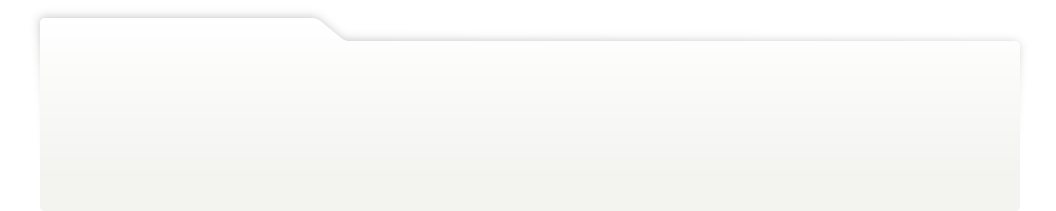
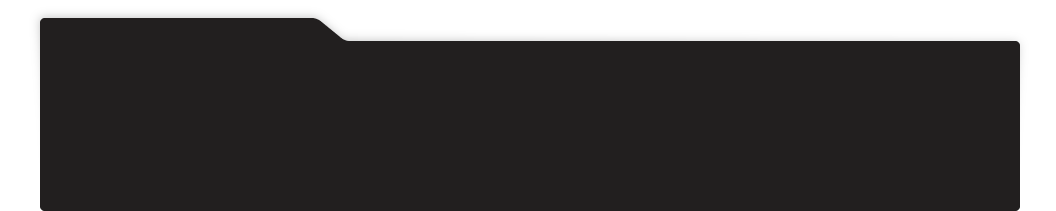
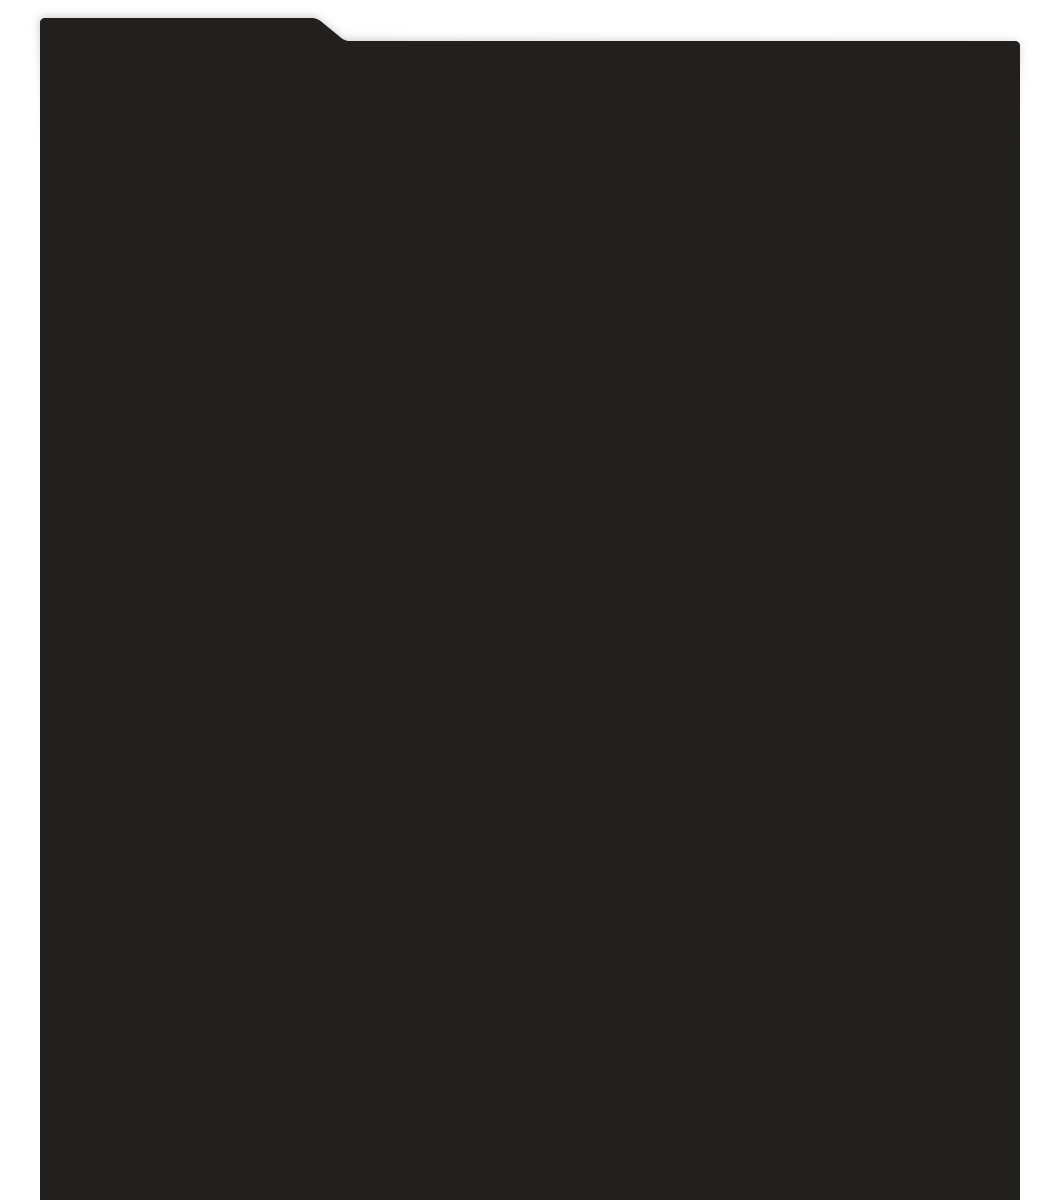
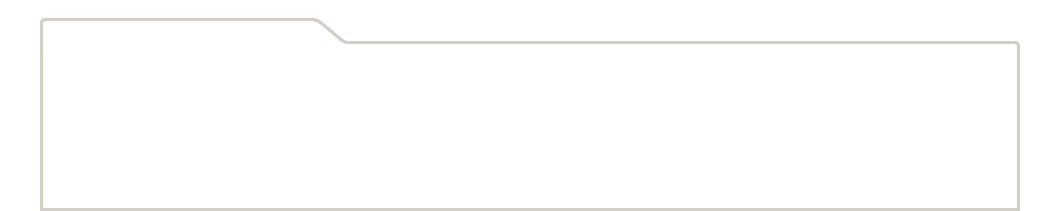
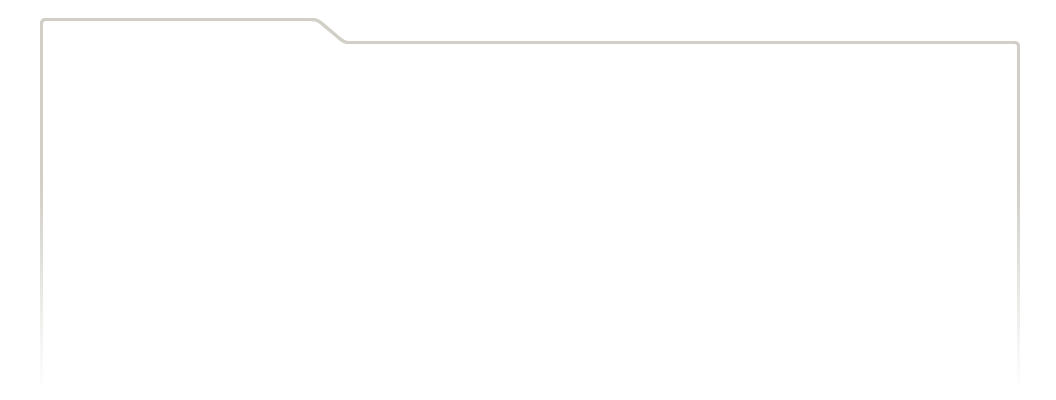
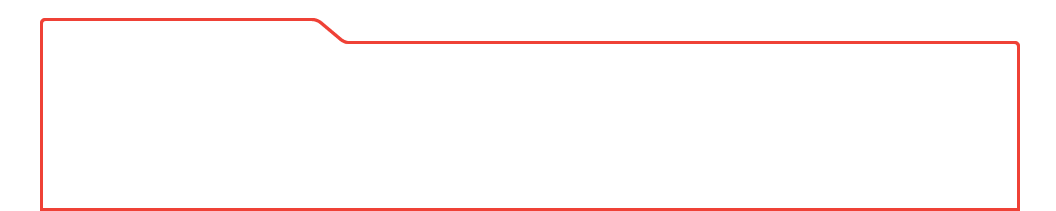
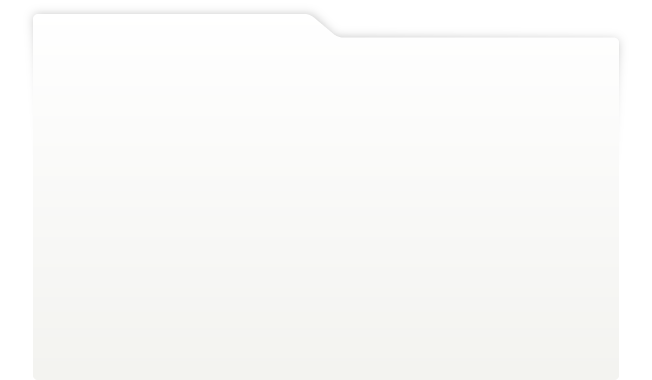
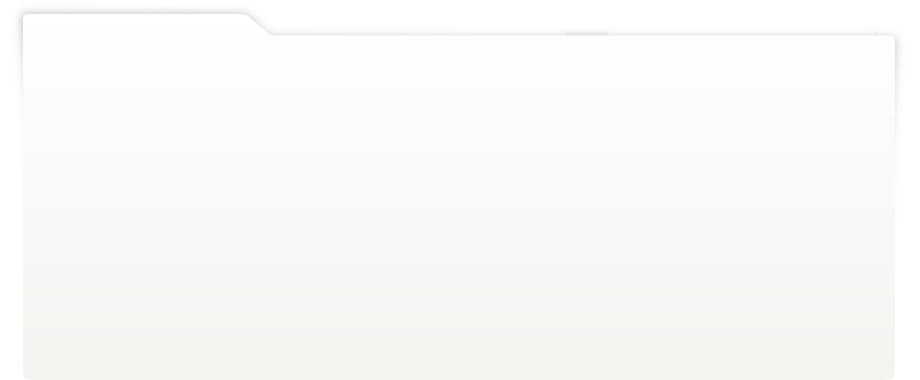
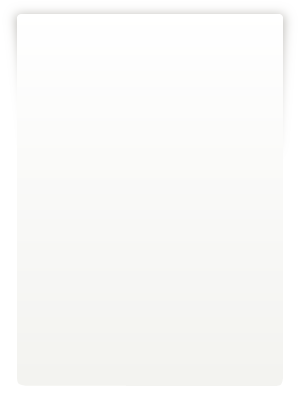
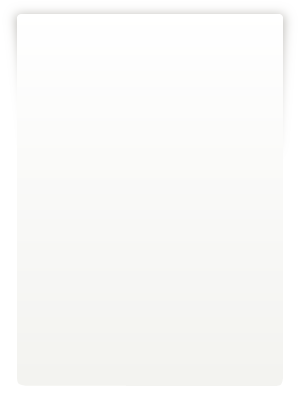
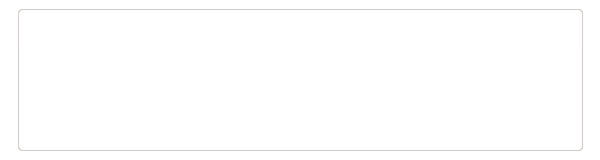
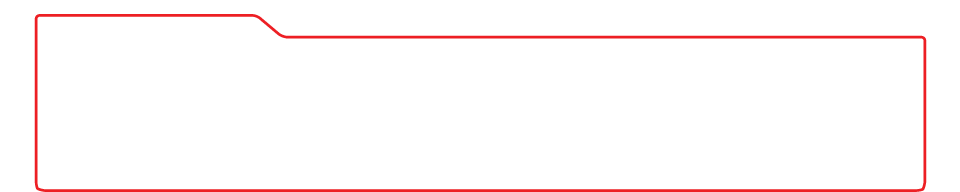
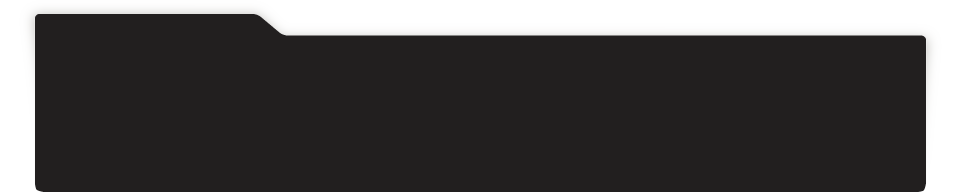
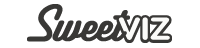
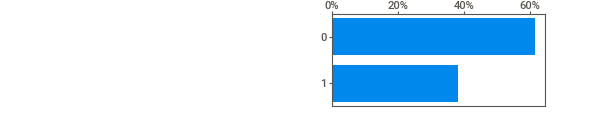
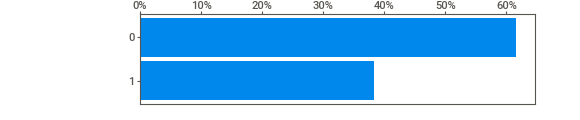
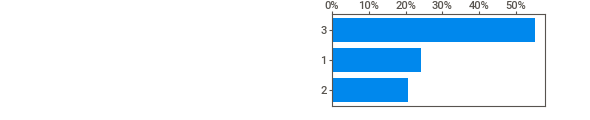
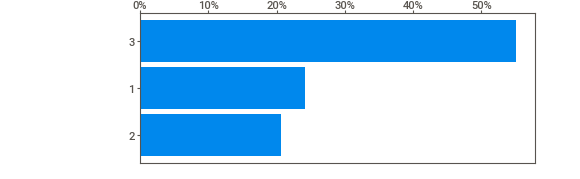
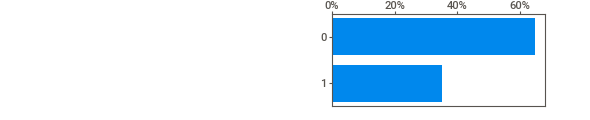
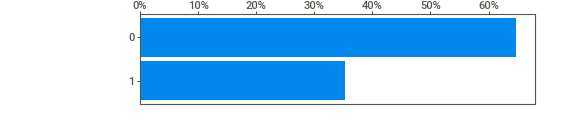
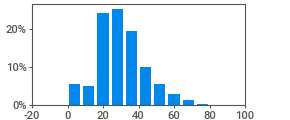
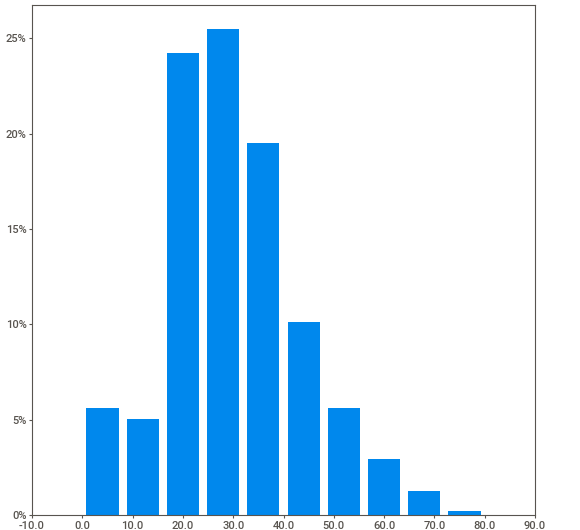
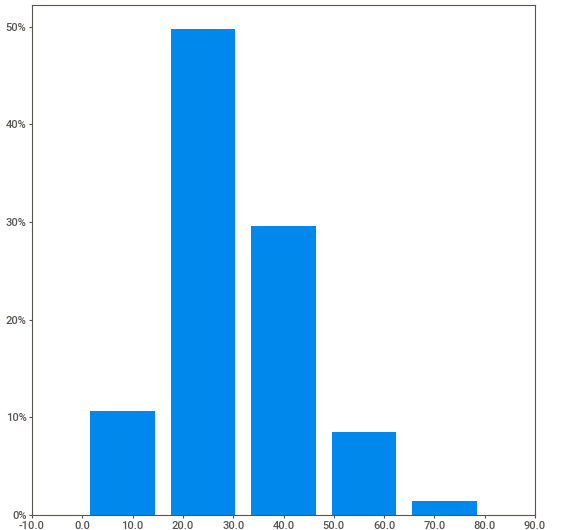
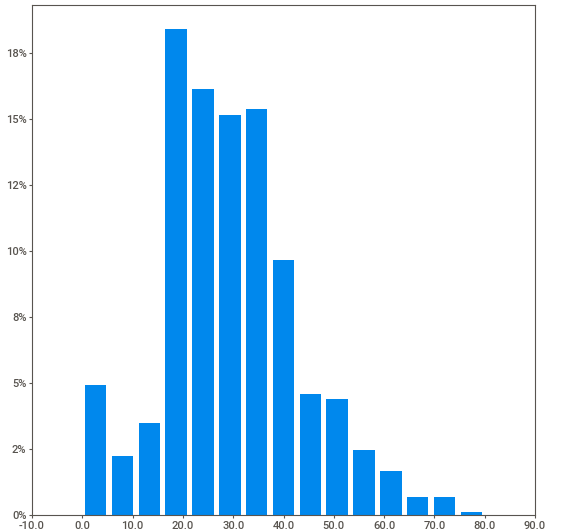
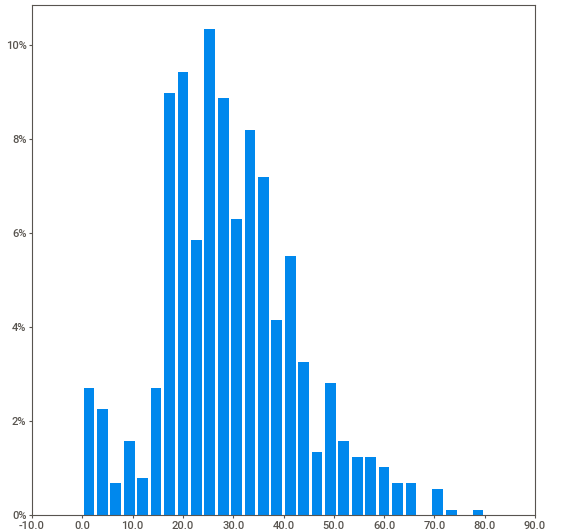
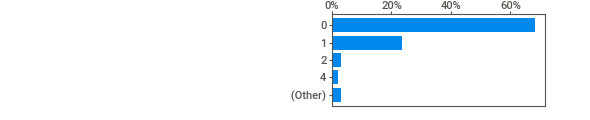
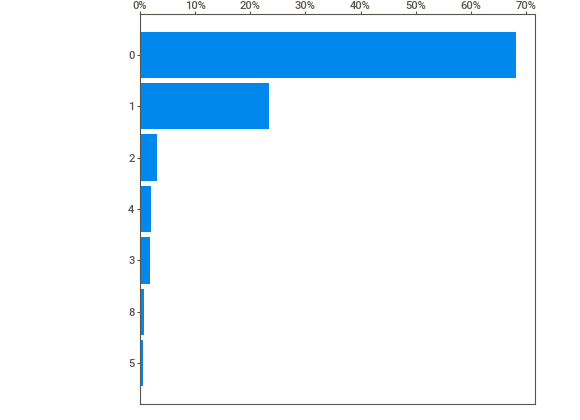
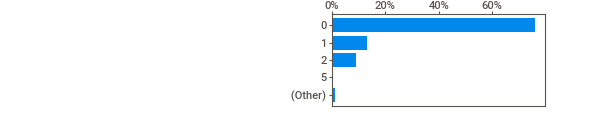
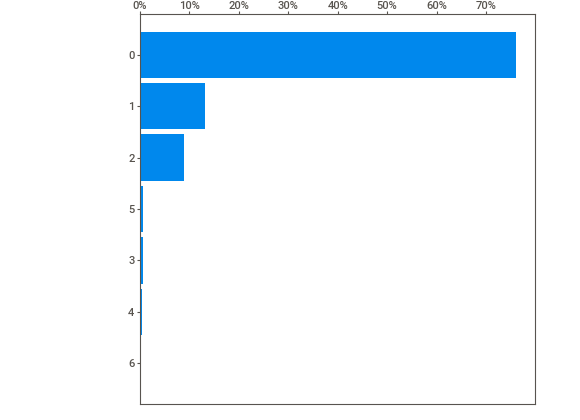
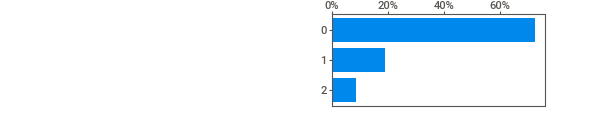
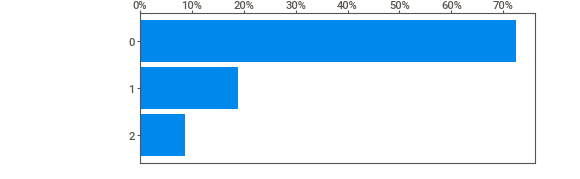
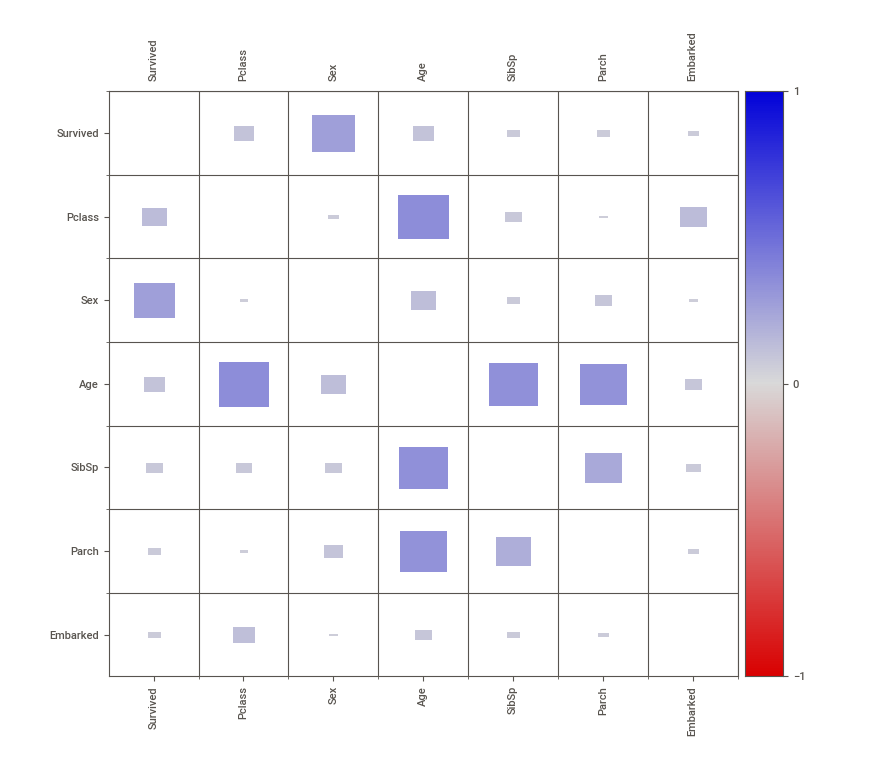
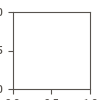

In [ ]:
my_report_train.show_notebook()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0,criterion="entropy")

X = data_train.drop(['Survived'], axis=1).values
Y = data_train['Survived'].values

clf.fit(X,Y)

DecisionTreeClassifier(random_state=0)

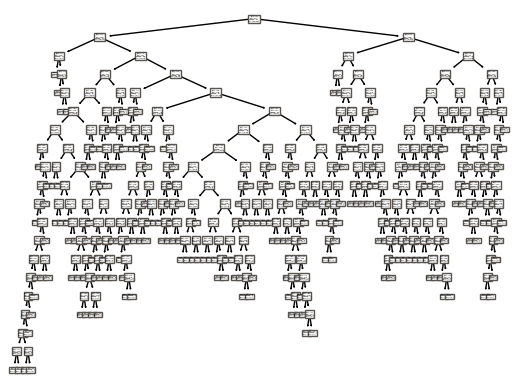

In [ ]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [ ]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


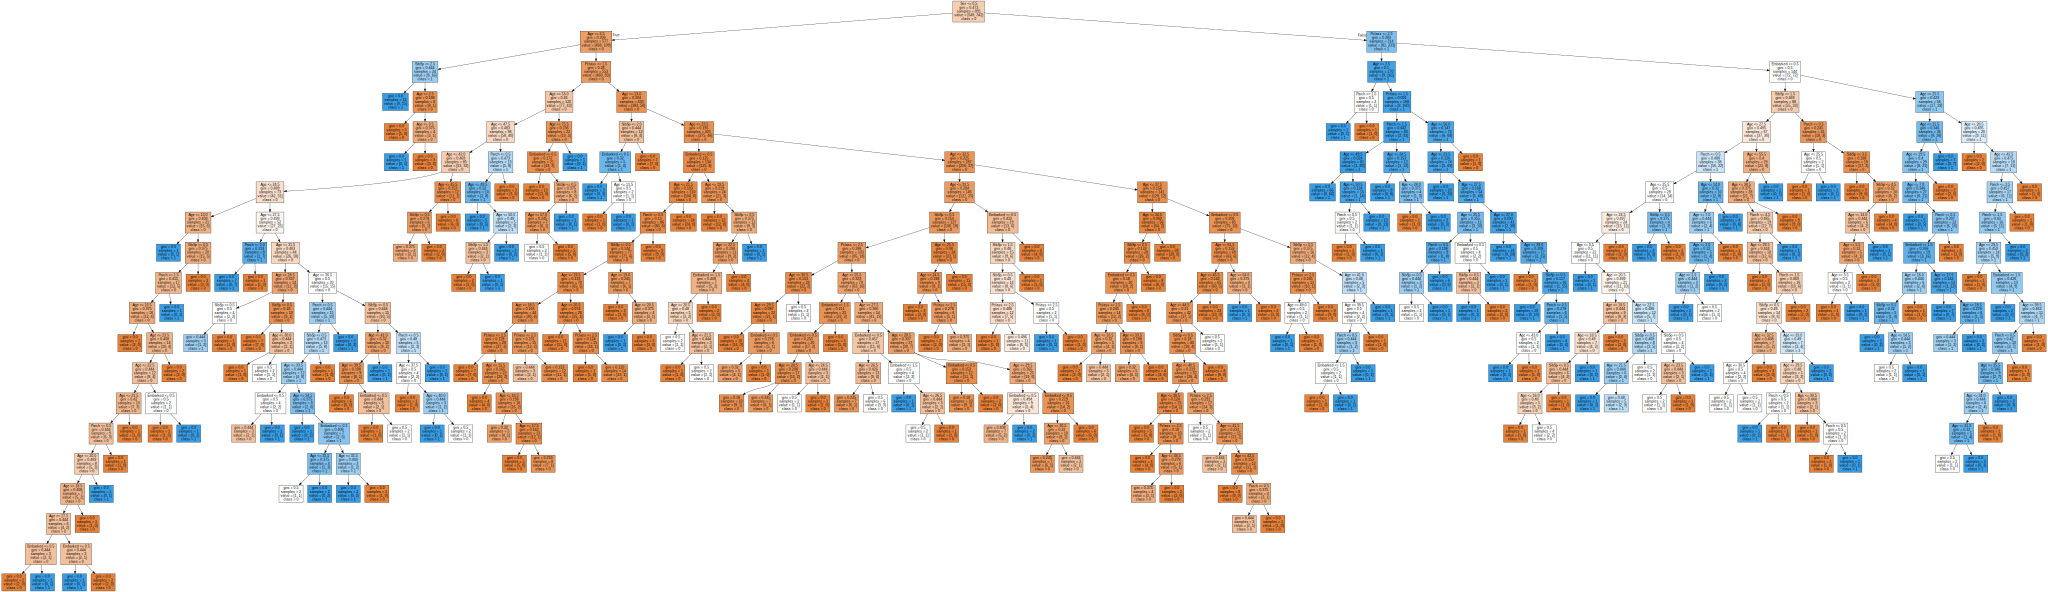

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=decisoes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
X_test = data_test.values
Y_pred = clf.predict(X_test)

In [ ]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.7990430622009569

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

0.7758458646616542

In [ ]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [ ]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 34,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [ ]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [ ]:
data_gender.shape

(418, 2)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_test['Survived'] = data_gender['Survived']

In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,0,34,0,0,2,0
1,3,1,47,1,0,0,1
2,2,0,62,0,0,2,0
3,3,0,27,0,0,0,0
4,3,1,22,1,1,0,1


In [ ]:
data_test.corr()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
Pclass,1.000000,-0.108615,-0.430290,0.001087,0.018721,0.031096,-0.108615
Sex,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779,1.000000
Age,-0.430290,-0.003778,1.000000,-0.067480,-0.050601,0.057969,-0.003778
SibSp,0.001087,0.099943,-0.067480,1.000000,0.306895,-0.100603,0.099943
Parch,0.018721,0.159120,-0.050601,0.306895,1.000000,-0.125164,0.159120
Embarked,0.031096,0.126779,0.057969,-0.100603,-0.125164,1.000000,0.126779
Survived,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779,1.000000


In [ ]:
# discretizar meus dados (colocar em baldes/faixas)

#for dataset in alldata:
 #   dataset['Age'] = dataset['Age'].astype(int)
#    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
##    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
 #   dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
 #   dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
 #   dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
 #   dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
 #   dataset.loc[ dataset['Age'] > 66, 'Age'] = 6



In [ ]:
#Variar os parâmetros abaixo, observando e reportando cada uma das árvores resultantes.
#a. Criterion = {“gini”, “entropy”}
#b. Splitter = {“best”, “random”}
#c. max_depth = {None,2, 4}
#d. min_samples_split = {2,10}
#2. Criar/plotar gráficos de barra
#3. Discutir diferenças entre as árvores?
